<figure>
  <IMG SRC="gfx/Logo_norsk_pos.png" WIDTH=100 ALIGN="right">
</figure>

# The Planck distribution
*Roberto Di Remigio*, *Luca Frediani*

In this set of exercises we will work with the Planck distribution. The first exercise is numerical, you will have to perform some unit conversions.
It will be particularly useful when you start looking into spectroscopy, as you have to be able to get a feel for the energies involved there.
In the second exercise, you will need to use your skills in calculus and Python. We will try to plot the Planck distribution based
on qualitative arguments (low and high frequency limit, maximum) and then obtain the exact plot using `matplotlib`.

The following list of constants will come in handy more than once during the lectures and the exercises:
\begin{align}
 h &= 6.62606957\cdot 10^{-34} \,\,\mathrm{J}\cdot\mathrm{s} \\
 c &= 299792458\,\, \mathrm{m}\cdot\mathrm{s}^{-1} \\
 k_\mathrm{B} &= 1.3806488\cdot{10}^{-23} \,\,\mathrm{J}\cdot\mathrm{K}^{-1} \\
 1\,\,\mathrm{eV} &= 1.602176565\cdot{10}^{-19}\,\, \mathrm{J} \\
 1\,\,\mathrm{A} &= 10^{-10}\,\,\mathrm{m}
\end{align}
whenever you need to find the universally accepted value of a constant you can refer to this website:
http://physics.nist.gov/cgi-bin/cuu/Info/Constants/index.html

### Fundamental constants from Python

You should use the [SciPy] module to obtain fundamental physical constants, instead of typing them in every time.
Here is an example of using Planck's constant from SciPy

[SciPy]: http://docs.scipy.org/doc/scipy/reference/index.html

In [2]:
from scipy.constants import *
print("The Planck constant h:", h)

The Planck constant h: 6.62607004e-34


SciPy has a quite extensive list of physical constants, fundamental or otherwise, that you can use.
For example, Avogadro's constants is simply:

In [3]:
print("Avogadro's constant", N_A)

Avogadro's constant 6.022140857e+23


The conversion factor between Joule and electronvolt can also be obtained. You can either search in the `physical_constants` __dictionary__ or call the `value` function:

In [4]:
print("Joule to electronvolt:", physical_constants['joule-electron volt relationship'])
print("Joule to electronvolt:", value('joule-electron volt relationship'))

Joule to electronvolt: (6.241509126e+18, 'eV', 38000000000.0)
Joule to electronvolt: 6.241509126e+18


What's the difference between the two? `physical_constants` is a __dictionary__, meaning that it is a list of values that can be searched _via_ a string. Much like a phone book! By looking at the __key__ `joule-electron volt relationship` we can retrieve the __value__ `(6.241509126e+18, 'eV', 38000000000.0)`.
This is called a __tuple__ and contains the following information:

- the numeric value of the conversion factor (6.241509126e+18)
- the unit of measure ('eV')
- the uncertainty (38000000000.0)

The `value` function is a convenience function that takes the __key__ to be searched in the `physical_constants` __dictionary__ and returns just the numeric value, instead of the whole tuple. 
You can find the entire list of keys in the `physical_constants` dictionary [here].

[here]: http://docs.scipy.org/doc/scipy/reference/constants.html#scipy.constants.physical_constants

## Exercise 1: The visible spectrum

The following picture shows the visible part of the electromagnetic spectrum. The _wavelength_ $\lambda$ associated with each colour in the spectrum is reported in nanometers.

<figure>
  <IMG SRC="gfx/visible.jpg" WIDTH=800>
</figure>

Your task is to convert each of the reported wavelengths into $\mathrm{A}$, $\mathrm{Hz}$ and $\mathrm{J}$.
You have to write a Python function for each conversion. The Python function will use the SciPy module to get the correct conversion factor and will have to return to converted value:
```Python
def convert_to_angstrom(lambda):
    import scipy
    # Which conversion factor?
    # Which operation?
    angstrom = lambda * ...
    # Return converted value
    return angstrom
```
Remember! You have to take into account the unit of measure of the incoming value `lambda`!
The wavelength to frequency and frequency to energy conversions are given by:

\begin{equation}
  c = \nu\lambda \quad\quad\quad\quad E = h\nu
\end{equation}

It is more common to find energies reported in another unit: the _electronvolt_ (symbol eV). Convert the energies from Joule to electronvolt, using the conversion factor given by SciPy. Define another function for this task.
One additional unit that is quite often used in spectroscopy is the _wavenumber_:

\begin{equation}
\bar{\nu} = \frac{1}{\lambda}
\end{equation}

which is measured in _reciprocal centimeters_ $\mathrm{cm}^{-1}$. Convert the wavelengths to reciprocal centimeters.
You can easily report you results in a table. To learn how, double click on this Markdown cell!

| $\lambda$ | $\nu$ |
|---|---|
| 1 | 2 |
| 2 | 3 |
| 3 | 5 |
| 4 | 2 |
| 5 | 6 |

## Exercise 2

The Planck distribution describes the radiation of energy from an ideal object called a _black body_. A black body is a model representing a material absorbing all incident electromagnetic radiation.
A black body is also a perfect emitter, meaning that it emits energy at every frequency isotropically (i.e. independently of direction)
The determination of the black body radiation spectrum had been a very puzzling problem for physicists during the second half of the 19th century.
The radiation spectrum can be quantified using:

- the _spectral radiance_, a function of frequency giving the amount of power emitted per solid angle per area per frequency. Its dimensions are $\mathrm{W}\cdot\mathrm{sr}^{-1}\cdot\mathrm{m}^{-2}\cdot\mathrm{Hz}^{-1}$;
- the _spectral irradiance_, a function of frequency giving the amount of power emitted per area per frequency (thus regardless of solid angle). Its dimensions are $\mathrm{W}\cdot\mathrm{m}^{-2}\cdot\mathrm{Hz}^{-1}$;

Using the laws of thermodynamics and electrodynamics known at the time, physicists were not able to derive a satisfactory explanation for the behaviour of a black body.
Planck assumed that the electromagnetic radiation is quantized, i.e. $E=h\nu$ where $h$ is the Planck's constant. Based on this assumption he was able to derive the correct form of the spectral irradiance for a black body.

The spectral irradiance as derived by Planck is:
\begin{equation}
 B(\nu, T) = \frac{8\pi h\nu^3}{c^2}\frac{1}{e^{\frac{h\nu}{k_\mathrm{B}T}}-1}
\end{equation}

In this exercise:
- Assuming the temperature $T$ to be a fixed parameter derive the form of Planck distribution when $\nu\rightarrow 0$ and $\nu\rightarrow \infty$, the low frequency and high frequency limit, respectively.
- Calculate the frequency $\nu_\mathrm{max}$ maximizing the spectral irradiance. You should then be able to roughly outline the shape of $B(\nu, T)$.
- Finally, plot $B(\nu, T)$ using `matplotlib`. You will have to use also SciPy to get the physical constants.

Use the following code cell as a template for the plotting.

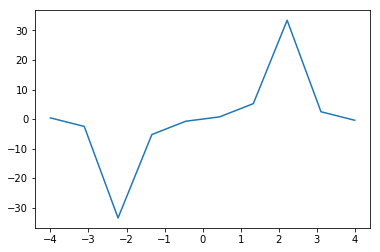

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

x = np.linspace(-4, 4, 10)
y = 10 * x**3 * np.exp(-x**2) + np.sin(x**5) / np.cos(x**3)

plt.plot(x, y)